In [4]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding
from analysis_SIM_generate_fun import *

# SIM - boost

In [73]:
def SIM_wing_path():
    def gen_wing_path_sim(path2_sample,ratio):
        genn_amt=1000#1000
        
#         alpha1=2
#         beta1=2
#         gamma1=1
#         alpha2=4
#         beta2=2
#         gamma2=1
        
        alpha1=2
        beta1=2
        gamma1=1
        alpha2=5
        beta2=2
        gamma2=1        
        para_adj_lower=0.9
        para_adj_higher=1.1
        
        alpha_adj_lower=0.8
        alpha_adj_higher=1.2
        
        alpha1_list= np.random.uniform(low=alpha1*alpha_adj_lower, high=alpha1*alpha_adj_higher, size=(genn_amt,)) #upper side
        beta1_list=np.random.uniform(low=beta1*para_adj_lower, high=beta1*para_adj_higher, size=(genn_amt,)) #upper side
        gamma1_list=np.random.uniform(low=gamma1*para_adj_lower, high=gamma1*para_adj_higher, size=(genn_amt,)) #upper side
        alpha2_list=np.random.uniform(low=alpha2*alpha_adj_lower, high=alpha2*alpha_adj_higher, size=(genn_amt,)) #downside
        beta2_list=np.random.uniform(low=beta2*para_adj_lower, high=beta2*para_adj_higher, size=(genn_amt,)) #downside
        gamma2_list=np.random.uniform(low=gamma2*para_adj_lower, high=gamma2*para_adj_higher, size=(genn_amt,)) #downside
        
        path1_pct_list=[99.5]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))
        path2_pct_list=[80]*genn_amt#np.random.uniform(low=100, high=100, size=(genn_amt,))

        i=0
        data_df=pd.DataFrame()
        for alpha1,alpha2,beta1,beta2,gamma1,gamma2,path1_pct,path2_pct in zip(alpha1_list,alpha2_list,beta1_list,beta2_list,gamma1_list,gamma2_list,path1_pct_list,path2_pct_list):
            data = generate_onepath(gene_num=1, alpha1=alpha1, alpha2=alpha2, beta1=beta1, beta2=beta2, gamma1=gamma1, gamma2=gamma2, path1_pct=path1_pct, path2_pct=path2_pct, path1_sample=int(path2_sample/ratio), path2_sample=path2_sample, noise_level=0.2)
            data.gene_name = 'simulation'+str(i)
            i=i+1
            if i % 100 == 0:print(i)
                
            dir_name='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(path2_sample)+'__R'+str(ratio)+'.csv'
            
            if i==1:
                data.to_csv(dir_name,index=False)
            else:
                data.to_csv(dir_name,index=False,mode='a',header=False)
                
                
    ratio_list=[0.4,0.6,0.8,1]
    path2_sample=1000#1000 #from (0,0) # 
    for ratio in ratio_list:
        # print(ratio)
        gen_wing_path_sim(path2_sample,ratio)
SIM_wing_path()

100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000
100
200
300
400
500
600
700
800
900
1000


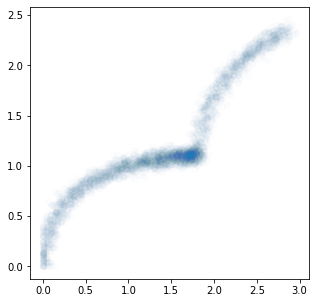

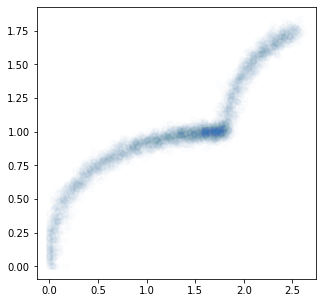

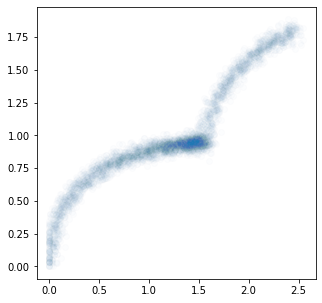

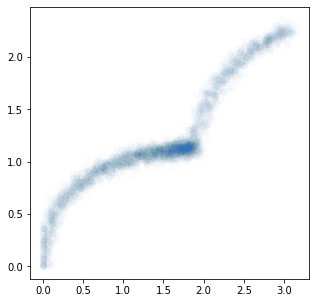

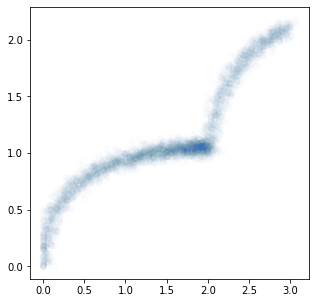

In [76]:
df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(1000)+'__R'+str(0.4)+'.csv')
gene_list=list(df.gene_name.drop_duplicates())[0:5]
for gene in gene_list:
    plt.figure(figsize=(5,5))
    onegene=df[df.gene_name==gene]
    plt.scatter(onegene.splice,onegene.unsplice,alpha=0.01)
    plt.show()

In [74]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
# srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

def run_celldancer(raw_data_path,ratio):
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio'+str(ratio)
    try:os.mkdir(save_path)
    except:print('')
    df=pd.read_csv(raw_data_path)
    loss_df, cellDancer_df=velocity(df,\
                                 # max_epoches=max_epoches,\
                                 # check_val_every_n_epoch=check_val_every_n_epoch,\
                                 # patience=patience,\
                                 # permutation_ratio=permutation_ratio,\
                                 speed_up=False,\
                                 # norm_u_s=norm_u_s,\
                                 # norm_cell_distribution=norm_cell_distribution,\
                                 n_jobs=40,\
                                 save_path=save_path)
ratio_list=[0.4,0.6,0.8,1]
ratio_list=[0.4]


for ratio in ratio_list:
    run_celldancer('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/wing_path_Path2Upper_'+str(1000)+'__R'+str(ratio)+'.csv',ratio)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.4/cell_dancer_velocity_2022-06-09 22-50-47 as the output path.
Arranging genes for parallel job.
1000  genes were arranged to  25  portions.



Velocity Estimation: 100%|██████████| 25/25 [07:52<00:00, 12.27s/it]                                                                                                
                                                                                                                                                                    

running celldancer analysis
0.4
0


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unsplice_predict_true'] = unsplice_predict
/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/SIM_sl/analysis_SIM_compare_fun_notebook.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['splice_predict_true'] = splice_predict


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


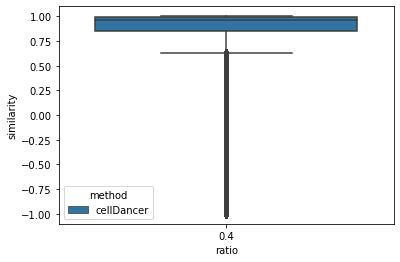

In [75]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/scv/'
foldername_para=''

########## celldancer
print('running celldancer analysis')

# for ratio in [0.2,0.4,0.6,0.8]:
for ratio in ratio_list:
    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='wing',foldername_para=foldername_para,path='Path2Upper')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv')
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

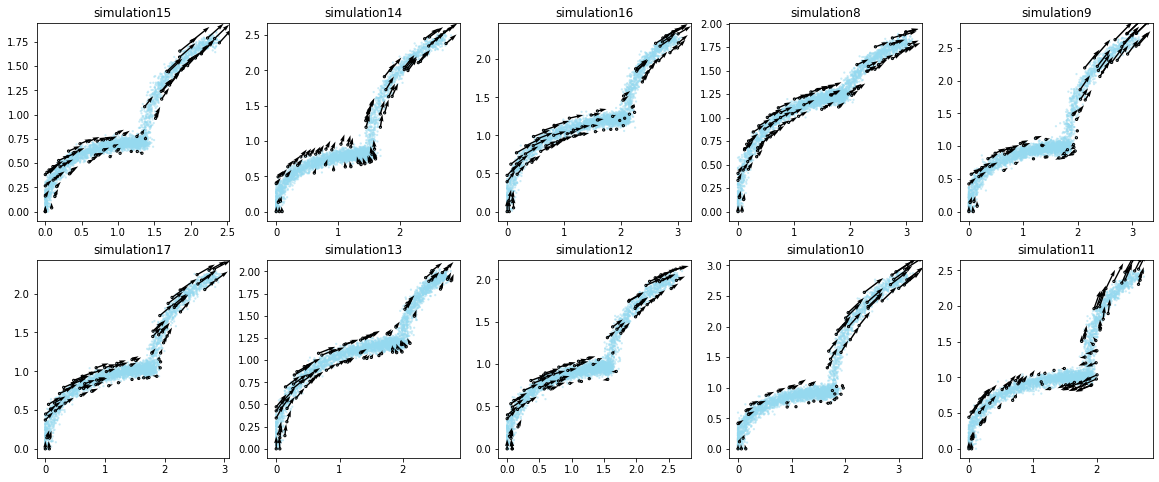

In [68]:
%autoreload 2
cellDancer_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio0.4/celldancer_estimation.csv')

gene_list=list(cellDancer_df.gene_name.drop_duplicates())[0:10]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    # ax.axis('off')

plt.show()